<a href="https://colab.research.google.com/github/harshit7271/Deep_learning_with_PyTorch/blob/main/PyTorch_Workflow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Workflow**

Let's explore an example PyTorch end-to-end workflow

RESOURCES (the book i am going to folow here) :
* Book version of Notebook - http://www.learnpytorch.io/01_pytorch_workflow/



In [1]:
import torch
from torch import nn  # nn contain PyTorch's all of the building blocks for neural networks
import matplotlib.pyplot as plt

# check PyTorch Versin
torch.__version__

'2.8.0+cu126'

# **1. Data Preparing and loading**

>**Data can be almost anything in ML**
* Excel spredsheet
* Image of any kind
* Videos
* Audio Like SINGS or PODCASTS
* DNA
* Text

**Machine Learning broadly a game of two parts :**    
1. Get data into numerical representation.
2. Build a model to learn patterns in that numeraical representation.

>*TO showcase this, lets create some KNOWN data using the linear Regression formula*

> We'll use a linear regresssion formula to make a straight line with *known* **Parameters**



In [2]:
# Lets create known parameters

weight = 0.7
bias =0.3

# Create
start = 0
end = 1
step = 0.02
X =  torch.arange(start,end,step).unsqueeze(dim=1)  # unsqueeze adds the extra dim to the tensor
y = weight * X + bias

X[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

# **Splitting Data into training and test sets (One of the most important concepts in ML in general)**

Let's create training and testing set with out data

In [4]:
# Create train test Split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Let's visualize this training and testing data

In [5]:
def plot_prediction(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None
):

   plt.figure(figsize=(10,7))
   plt.scatter(train_data, train_labels, c="r", s=4, label="Training data")
   plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

# Check if there are predictions?

   if predictions is not None:
     plt.scatter(test_data, predictions, c="y", s=4, label="Predictions")

   plt.legend(prop={"size":14});

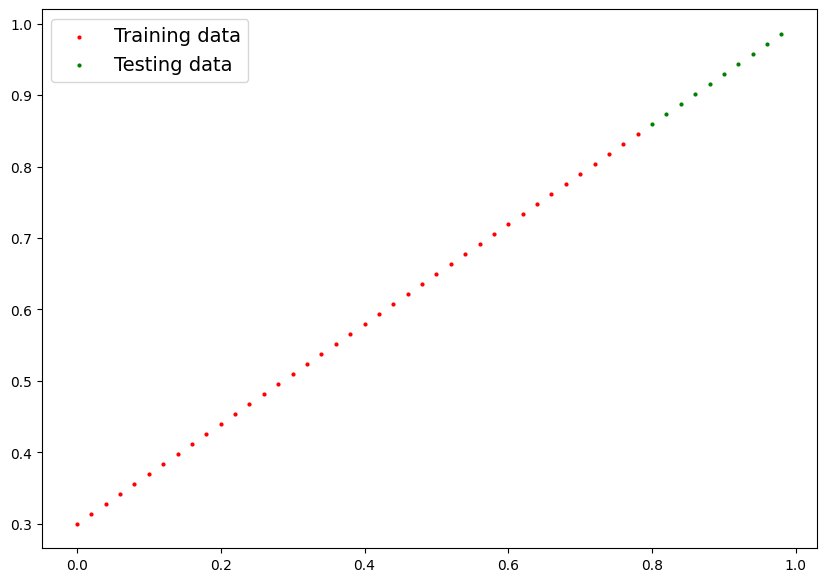

In [6]:
plot_prediction();

# **2. Building the model**
**My first PyTorch model**
>What our model does:

 1. Start with random values(weights and bias)
 2. Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights and bias values used to create the data)

 > these thing happen through Gradient Descent and Back Propagation

In [7]:
from torch import nn

# Create linear Regression model class

class LinearRegressionModel(nn.Module):         # almost everything in Pytorch inherits from nn.model
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))    # though requires_grad = True is a default parameter we don't need to define it

    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))

  # Foward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:  # 'x' is the input data
    return self.weights *x + self.bias    # this is the linear regression formula

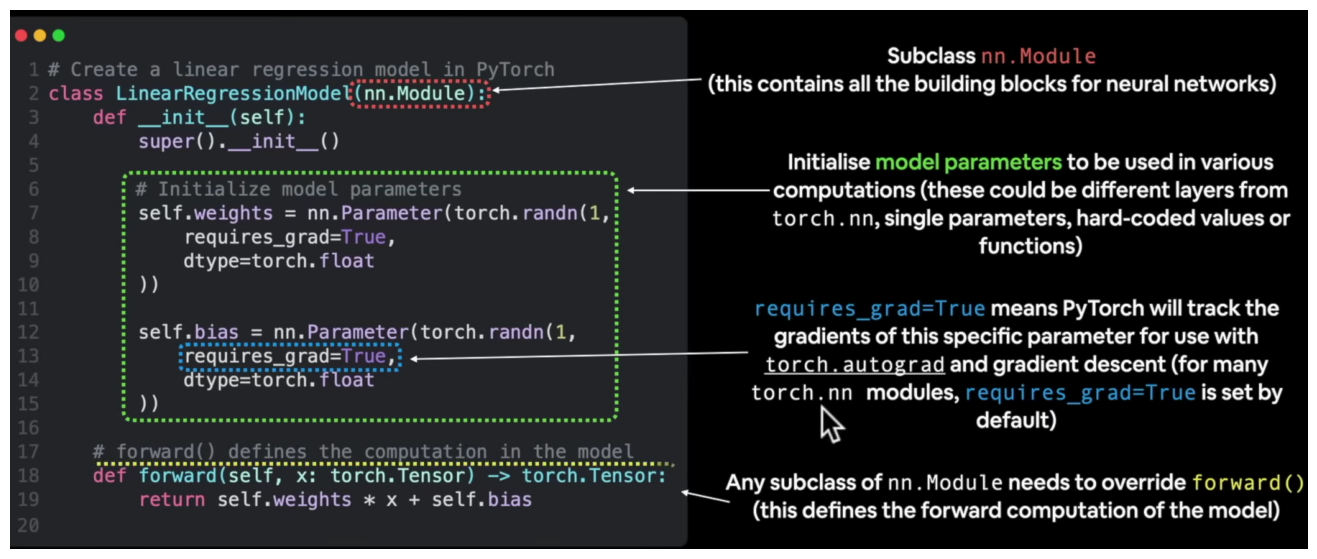

In [8]:
import matplotlib.image as mpimg
plt.figure(figsize=(20,7))
img = mpimg.imread('/content/Screenshot 2025-10-16 225945.png')

plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

## **PyTorch model building essentials**
PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.


They are `torch.nn`, `torch.optim`, `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`. For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

> `torch.nn` :	Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).

> `torch.nn.Parameter` :	Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient  descent) are calculated automatically, this is often referred to as "autograd".

> `torch.optim` :	Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).

> `def forward()` : All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above)

## ***If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`***

* nn.Module contains the larger building blocks (layers)
* nn.Parameter contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
* forward() tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)
* torch.optim contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data


### **We can refer to this PyTorch cheatsheet for rferences and help :**
https://www.learnpytorch.io/pytorch_cheatsheet/


# Checking the content of our PyTorch model
**by using `.parameters()`**

In [9]:
# Create a random seed
torch.manual_seed(42)         # this actually fixes the tensor to a fixed number and if we dont use it the value of random tensor will keep on changing

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check the parameters of our model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# example of random seed now
"""  torch.manual_seed(42)
     torch.randn(1)       # everytime we will run this the value will be same now  """

'  torch.manual_seed(42)\n     torch.randn(1)       # everytime we will run this the value will be same now  '

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias

(0.7, 0.3)

# **3. Making predictions using `torch.inference_mode()`**
To check our models predictive poower, let's see how well it predicts `y_test` based on `X_test`.
* when we pass our data through our model, it's going to run it through the `forward()` method

In [13]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [14]:
# make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# we can also do something similar with torch.no_grad. however, torch.inference_mode() is preferred
# with torch.no_grad():
  # y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

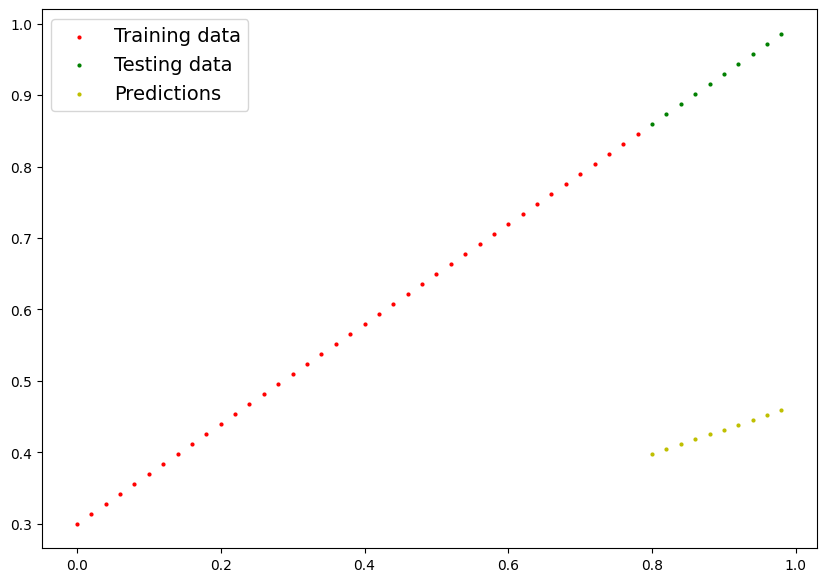

In [16]:
plot_prediction(predictions = y_preds)

# **4. Train Model**
The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.
or  in other words from a poor representation of data to a better representation of the data.

one way to measure how poor or how wrong your models predictions are is to use a loss function
* NOTE : Loss function may also called as cost function or criterian in dif areas.


 *This is what we gonna need to train our model:*
* **Loss Fuction :** - A function to measure how wrong your model predictions are to the ideal outputs, lower is better.
* **Optimizers :** - Takes into account the loss of model and adjusts the model's parameters (e.g. weights and bias),
https://docs.pytorch.org/docs/main/optim.html

> **if you want to learn more about Loss functions, Optimizers and its types, Gradient Descent, chain rule of differentiation and Vanishing Gradient Descent that you can refer to my personal Blog of detailed mathematics for deep learning**

* [Detailed Blog On Mathematics behind Deep Learning with notes](https://medium.com/@harshitsingh05893312/mathematical-approach-toward-deep-learning-11e46c30d1d9)

> Inside optimizer you'll often have to set two parameters :    
*  `params` - the model parameters ypu'd like to optimize, for example `params = model_0.parameters()`
* `lr`(Learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parametrs with each step (a small `lr` results in small changes, a large`lr` results in large changes)

And specially for PyTorch, we need :    
* A training loop
* A testing loop

## ***To learn which loss function or optimizers should i use and when to use, refer to my personal blog mentioned above***



In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
# check out our model's parameters (a parameter is a value that the model set for itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# Setup a Loss function
loss_fn = nn.L1Loss()

# Setup an Optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)  # lr is learning rate, possibly the most important hyperparameter we set by ourself

In [20]:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

# Building a training (and a testing) loop in PyTorch

**A couple of things we need in a training loop:**

1. Loop through the data
2. Forward pass(this involves the data moving through our model's `forward()` functions) - also called as **forward propagation**
3. Calculate the loss (compare forward pass predictions to ground truth labels)
4. Optimizer Zero Grad
5. Loss backward - move backwards through the networks to calculate the gradient of each of the parameters of our model with respect to the loss (that's **Back Propagation**)
6. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**Gradient Descent**)

*Note : **Gradient** is a slope (change in x and y axis)*

In [50]:
torch.manual_seed(42)


# an epoch is one loop through the data.. (this is a hyperparameter bcz we've set it ourselves)
epochs = 100

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. loop through the data
for epoch in range(epochs):

  #set the model to training mode
  model_0.train()     # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)   # we learn patterns on training data to evaluate our madel on test data

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss : {loss}")

  # 3. Optimizer zero grad  (They accumulate every epoch, zero them to start fresh each forward pass)
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (Perform Gradient Gradient)
  optimizer.step()

  ## TESTING

  model_0.eval()  # turns off different setting in the model not needed for the evaluation of the model
  with torch.inference_mode():    # turn off gradient tracking & a couple of more things behind the scene
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the Loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss} | Test Loss : {test_loss}")

  # Print out model state_dict()
  # print(model_0.state_dict())


Epoch : 0 | Loss : 0.008932482451200485 | Test Loss : 0.005023092031478882
Epoch : 10 | Loss : 0.008932482451200485 | Test Loss : 0.005023092031478882
Epoch : 20 | Loss : 0.008932482451200485 | Test Loss : 0.005023092031478882
Epoch : 30 | Loss : 0.008932482451200485 | Test Loss : 0.005023092031478882
Epoch : 40 | Loss : 0.008932482451200485 | Test Loss : 0.005023092031478882
Epoch : 50 | Loss : 0.008932482451200485 | Test Loss : 0.005023092031478882
Epoch : 60 | Loss : 0.008932482451200485 | Test Loss : 0.005023092031478882
Epoch : 70 | Loss : 0.008932482451200485 | Test Loss : 0.005023092031478882
Epoch : 80 | Loss : 0.008932482451200485 | Test Loss : 0.005023092031478882
Epoch : 90 | Loss : 0.008932482451200485 | Test Loss : 0.005023092031478882


In [51]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [52]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)


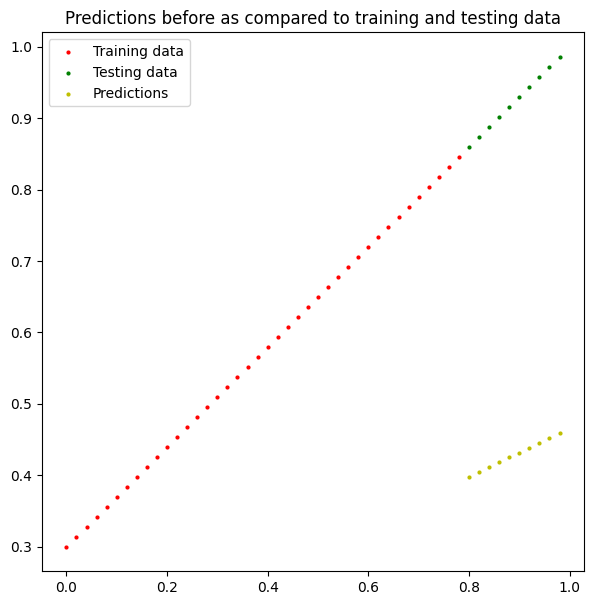

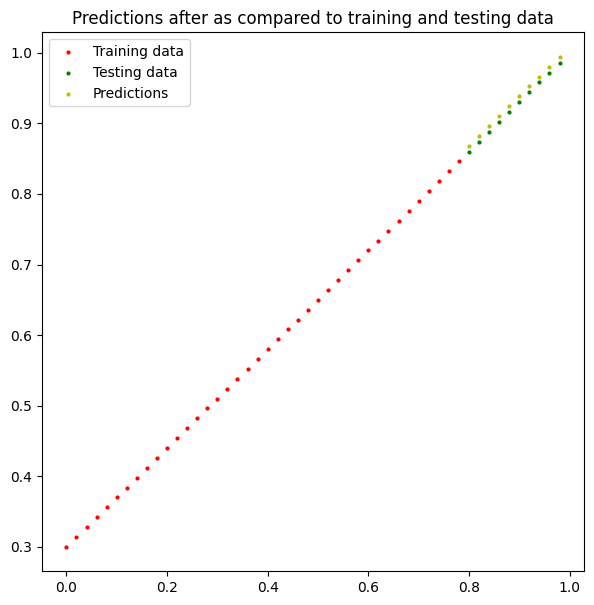

In [53]:
# let's compare the predictions before and after back propagation

# BEFORE
plt.figure(figsize=(7,7))
plt.scatter(X_train, y_train, c="r", s=4, label="Training data")
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")
plt.scatter(X_test, y_preds, c="y", s=4, label="Predictions")
plt.legend()
plt.title("Predictions before as compared to training and testing data")
plt.show()

# AFTER
plt.figure(figsize=(7,7))
plt.scatter(X_train, y_train, c="r", s=4, label="Training data")
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")
plt.scatter(X_test, y_preds_new, c="y", s=4, label="Predictions")
plt.title("Predictions after as compared to training and testing data")
plt.legend()
plt.show()